In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sehat = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sehat

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# menghitung mean
sehat.mean()

C:\Users\FOX PROJECT\AppData\Local\Temp\ipykernel_24628\232031611.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sehat.mean()


Person ID                   187.500000
Age                          42.184492
Sleep Duration                7.132086
Quality of Sleep              7.312834
Physical Activity Level      59.171123
Stress Level                  5.385027
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64

In [5]:
# menghitung standar deviasi
sehat.std(ddof=1)

C:\Users\FOX PROJECT\AppData\Local\Temp\ipykernel_24628\4243831345.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sehat.std(ddof=1)


Person ID                   108.108742
Age                           8.673133
Sleep Duration                0.795657
Quality of Sleep              1.196956
Physical Activity Level      20.830804
Stress Level                  1.774526
Heart Rate                    4.135676
Daily Steps                1617.915679
dtype: float64

In [6]:
# menghitung varians
sehat.var(ddof=1)

C:\Users\FOX PROJECT\AppData\Local\Temp\ipykernel_24628\359119419.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sehat.var(ddof=1)


Person ID                  1.168750e+04
Age                        7.522324e+01
Sleep Duration             6.330696e-01
Quality of Sleep           1.432703e+00
Physical Activity Level    4.339224e+02
Stress Level               3.148944e+00
Heart Rate                 1.710381e+01
Daily Steps                2.617651e+06
dtype: float64

In [7]:
import pandas as pd
from scipy import stats


# Pilih hanya kolom numerik
sehat2 = sehat.select_dtypes(include=['float64', 'int64']).columns  # Memilih kolom numerik

# Loop untuk menghitung Z-score dan mencari outliers untuk setiap kolom numerik
for col in sehat2:
    sehat[f'z_score_{col}'] = stats.zscore(sehat[col])  # Menghitung Z-score untuk tiap kolom numerik
    
    # Mencari outliers dengan Z-score lebih dari 3 atau kurang dari -3
    outliers_zscore = sehat[sehat[f'z_score_{col}'].abs() > 3]
    
    if not outliers_zscore.empty:
        print(f"Outliers di kolom {col}:")
        print(outliers_zscore[[col, f'z_score_{col}']])  # Menampilkan outliers untuk kolom tersebut
    else:
        print(f"Tidak ada outliers di kolom {col}.")



Tidak ada outliers di kolom Person ID.
Tidak ada outliers di kolom Age.
Tidak ada outliers di kolom Sleep Duration.
Tidak ada outliers di kolom Quality of Sleep.
Tidak ada outliers di kolom Physical Activity Level.
Tidak ada outliers di kolom Stress Level.
Outliers di kolom Heart Rate:
     Heart Rate  z_score_Heart Rate
3            85            3.591698
4            85            3.591698
5            85            3.591698
93           84            3.349575
145          84            3.349575
264          83            3.107453
266          83            3.107453
276          86            3.833820
277          86            3.833820
Tidak ada outliers di kolom Daily Steps.


In [8]:
# Loop untuk menghitung Q1, Q3, IQR, dan batas bawah/atas untuk setiap kolom
for col in sehat2:
    Q1 = sehat[col].quantile(0.25)  # Kuartil 1
    Q3 = sehat[col].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1                # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas 
    
    # Menampilkan Q1, Q3, IQR, dan batas bawah/atas
    print(f"Kolom: {col}")
    print(f"Q1 (Kuartil 1): {Q1}")
    print(f"Q3 (Kuartil 3): {Q3}")
    print(f"IQR (Interquartile Range): {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print('\n')


Kolom: Person ID
Q1 (Kuartil 1): 94.25
Q3 (Kuartil 3): 280.75
IQR (Interquartile Range): 186.5
Lower Bound: -185.5
Upper Bound: 560.5


Kolom: Age
Q1 (Kuartil 1): 35.25
Q3 (Kuartil 3): 50.0
IQR (Interquartile Range): 14.75
Lower Bound: 13.125
Upper Bound: 72.125


Kolom: Sleep Duration
Q1 (Kuartil 1): 6.4
Q3 (Kuartil 3): 7.8
IQR (Interquartile Range): 1.3999999999999995
Lower Bound: 4.300000000000001
Upper Bound: 9.899999999999999


Kolom: Quality of Sleep
Q1 (Kuartil 1): 6.0
Q3 (Kuartil 3): 8.0
IQR (Interquartile Range): 2.0
Lower Bound: 3.0
Upper Bound: 11.0


Kolom: Physical Activity Level
Q1 (Kuartil 1): 45.0
Q3 (Kuartil 3): 75.0
IQR (Interquartile Range): 30.0
Lower Bound: 0.0
Upper Bound: 120.0


Kolom: Stress Level
Q1 (Kuartil 1): 4.0
Q3 (Kuartil 3): 7.0
IQR (Interquartile Range): 3.0
Lower Bound: -0.5
Upper Bound: 11.5


Kolom: Heart Rate
Q1 (Kuartil 1): 68.0
Q3 (Kuartil 3): 72.0
IQR (Interquartile Range): 4.0
Lower Bound: 62.0
Upper Bound: 78.0


Kolom: Daily Steps
Q1 (Kuartil

import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil semua kolom numerik
numerical_columns = sehat.select_dtypes(include=['float64', 'int64']).columns

# Loop melalui setiap kolom numerik dan membuat plot KDE
for col in numerical_columns:
    plt.figure(figsize=(8, 6))  # Membuat ukuran plot agar lebih besar
    sns.kdeplot(sehat[col], shade=True)  # Membuat KDE plot untuk setiap kolom
    plt.title(f'Density Plot untuk {col}')  # Menambahkan judul untuk setiap kolom
    plt.xlabel(col)
    plt.show()


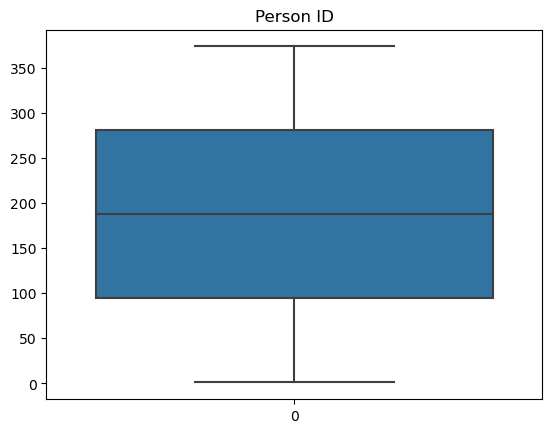

In [9]:
sns.boxplot(sehat['Person ID'])
plt.title('Person ID')
plt.show()

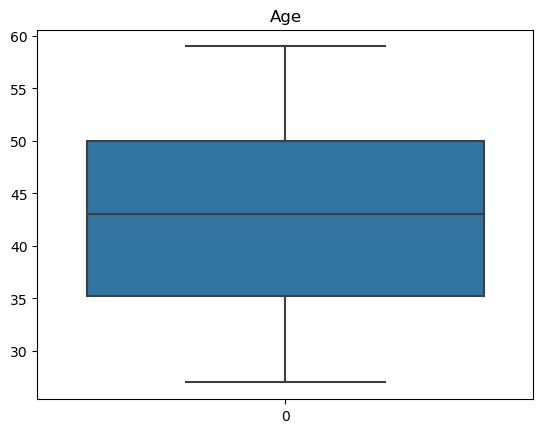

In [10]:
sns.boxplot(sehat['Age'])
plt.title('Age')
plt.show()

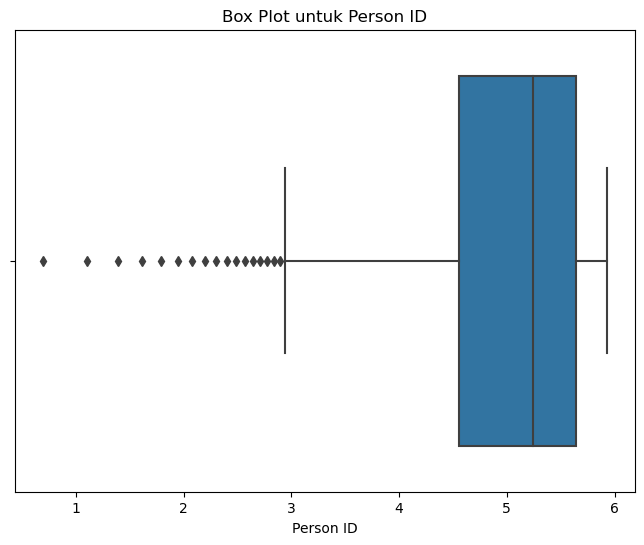

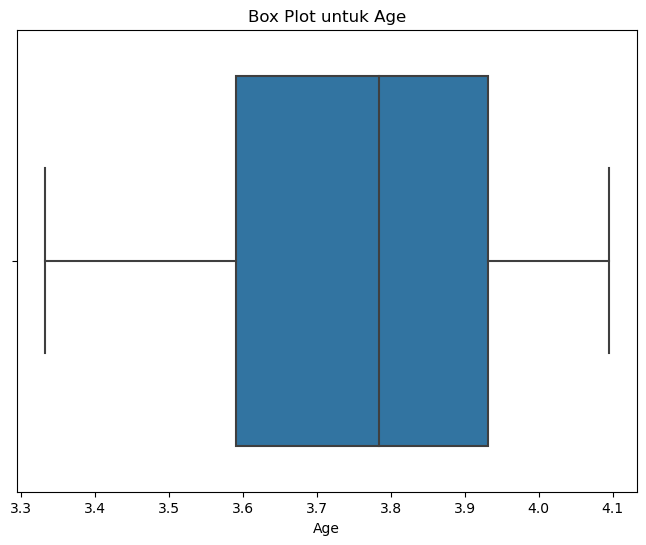

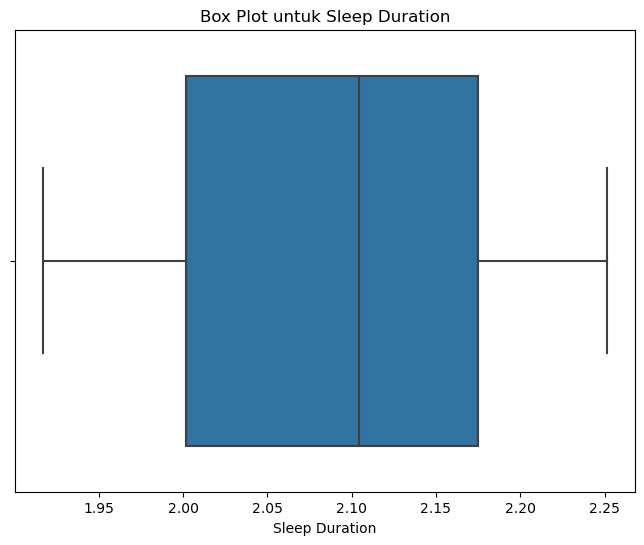

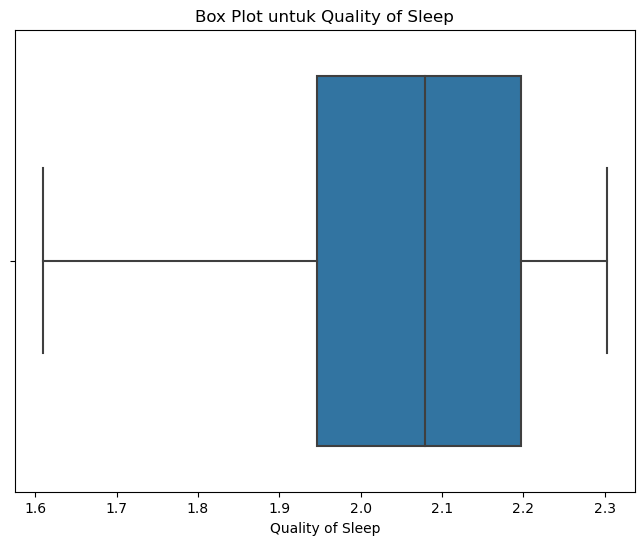

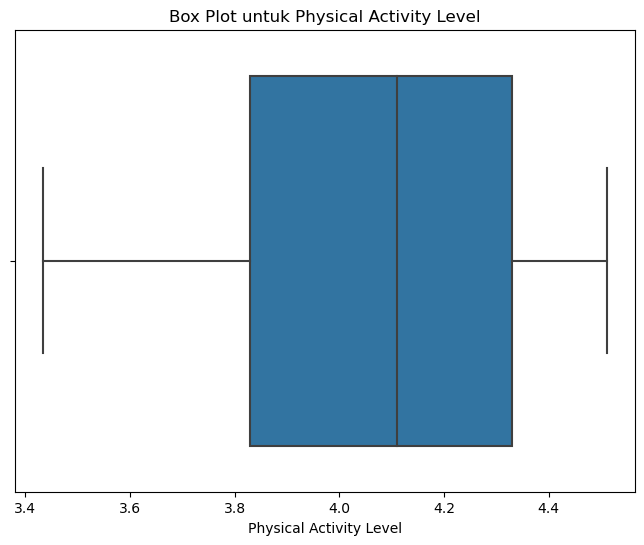

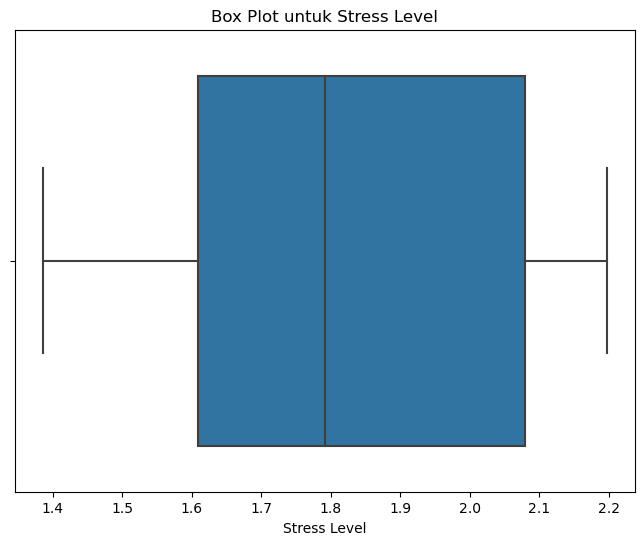

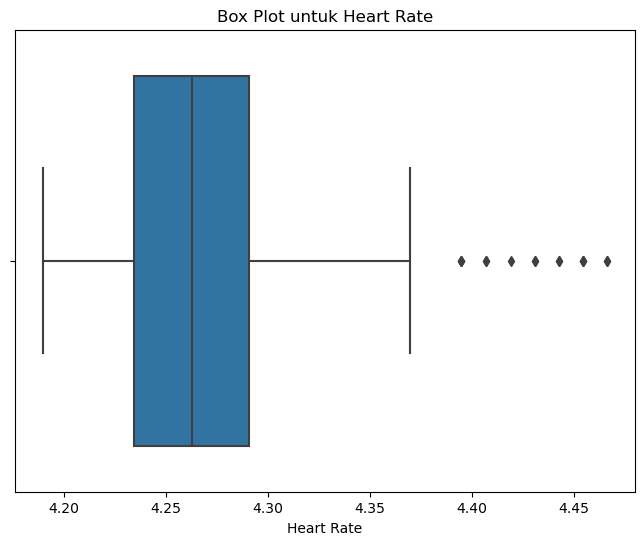

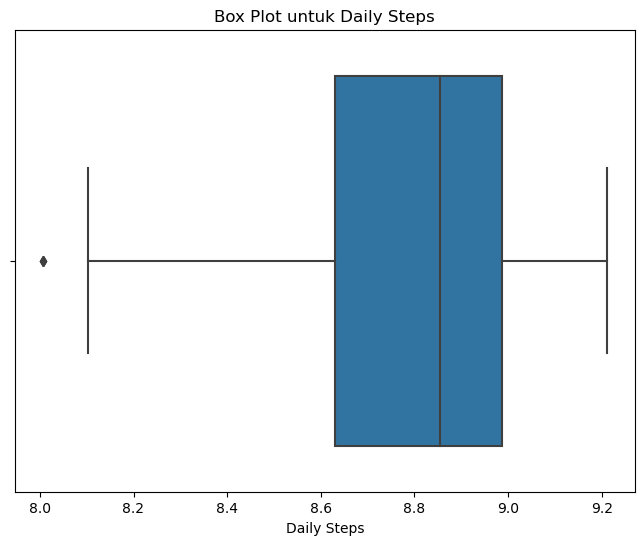

In [14]:
for col in columns_log:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(y=df[col])  # Mengubah orientasi menjadi vertikal
    plt.title(f'Box Plot untuk {col}') 
    plt.show()

